In [27]:
from google.colab import drive
drive.mount('/content/drive')
# mounting all contents of drive to acess the data set

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.makedirs('/content/ML')
# creating a folder to start

In [3]:
!cp -r /content/drive/MyDrive/OE_ML_COMP /content/ML
# copying the folder from drive to local run time so that i could start building my project

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#reading the data_file
df=pd.read_csv('/content/ML/OE_ML_COMP/train.csv')
print(len(df))
df.head(5)


3886


,ID,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
0,2017424150,2017,4,24,1,50,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2017424250,2017,4,24,2,50,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,2017424350,2017,4,24,3,50,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
3,2017424450,2017,4,24,4,50,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
4,2017424550,2017,4,24,5,50,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


In [125]:
len(df.ID.unique())

3778

In [126]:
df=df[~df.ID.duplicated()]
len(df)

3778

In [127]:
#waves get stronger in the night time only, sometimes when the moon is up in the sky 
#during the day time then also waves get stronger and the reason behind it is the same. 
#The gravitational pull of the moon attracts the sea water when the moon is u in the sky no matter 
#what time it is, also the gravitational pull of the sun attracts the water on Earth but the force of 
#gravity due to the sun is very less on Earth.


### So i would be considering the month(for particluar season) and the hour(for specific part of the day) and DAY (purnima and amavashya)

In [128]:
df1=df.drop(['#YY','mm','ATMP(degC)','DEWP(degC)','ID'],axis=1)
# id is just the representation of time so dropping
print(len(df1))
df1.head()


3778


,MM,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC),WVHT(m)
0,4,24,1,23,3.0,3.6,4.17,3.33,349,1019.1,5.1,0.39
1,4,24,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.8,0.65
2,4,24,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.7,0.90
3,4,24,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,0.91
4,4,24,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.6,0.88


In [129]:
# Check any abnormilities in direction , month , day , hour
print(len(df1[df1['WDIR(degT)']<0]))
print(len(df1[df1['WDIR(degT)']>360]))
print(len(df1[df1['MM']<1] & (df1['MM']>12)))
print(len(df1[(df1['DD']>31) & (df1['DD']<0)]))
print(len(df1[(df1['hh']>23) & (df1['hh']<0)]))

0
0
0
0
0


In [130]:
df1.describe() # to check all the statistics

,MM,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC),WVHT(m)
count,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.00000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000,3778.000000
mean,6.571731,16.506882,11.768925,163.585760,5.740842,6.85630,4.205262,3.526702,137.172578,1014.240762,14.788512,0.641088
std,1.408874,8.712243,6.669696,113.398782,2.371486,2.83343,1.034852,0.585015,108.969865,5.753704,7.368598,0.370876
min,4.000000,1.000000,0.000000,1.000000,0.000000,0.20000,2.150000,2.290000,0.000000,992.100000,3.500000,0.250000
25%,5.000000,9.000000,6.000000,53.000000,4.000000,4.80000,3.450000,3.080000,33.000000,1010.700000,6.700000,0.360000
50%,6.000000,18.000000,12.000000,168.000000,5.600000,6.60000,4.000000,3.430000,139.000000,1014.300000,16.800000,0.525000
75%,8.000000,24.000000,17.000000,258.000000,7.300000,8.70000,4.760000,3.890000,193.000000,1018.000000,21.800000,0.820000
max,9.000000,31.000000,23.000000,360.000000,13.500000,16.80000,17.390000,5.770000,360.000000,1030.600000,25.300000,2.630000


In [131]:
len(df1[df1['WSPD(m/s)']==0]) # wind speed cant be zero

1

In [132]:
df2=df1[df1['WSPD(m/s)']!=0]
df2.head()

,MM,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC),WVHT(m)
0,4,24,1,23,3.0,3.6,4.17,3.33,349,1019.1,5.1,0.39
1,4,24,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.8,0.65
2,4,24,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.7,0.90
3,4,24,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,0.91
4,4,24,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.6,0.88


In [133]:
df2.describe()

,MM,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC),WVHT(m)
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000
mean,6.572147,16.510458,11.767276,163.582473,5.742362,6.858062,4.204903,3.526495,137.114906,1014.238576,14.790495,0.641189
std,1.408828,8.710623,6.669808,113.413617,2.369959,2.831734,1.034754,0.584953,108.926613,5.752896,7.368565,0.370873
min,4.000000,1.000000,0.000000,1.000000,0.100000,0.400000,2.150000,2.290000,0.000000,992.100000,3.500000,0.250000
25%,5.000000,9.000000,6.000000,53.000000,4.000000,4.800000,3.450000,3.080000,33.000000,1010.700000,6.700000,0.360000
50%,6.000000,18.000000,12.000000,168.000000,5.600000,6.600000,4.000000,3.430000,139.000000,1014.300000,16.800000,0.530000
75%,8.000000,24.000000,17.000000,258.000000,7.300000,8.700000,4.760000,3.890000,193.000000,1018.000000,21.800000,0.820000
max,9.000000,31.000000,23.000000,360.000000,13.500000,16.800000,17.390000,5.770000,360.000000,1030.600000,25.300000,2.630000


In [134]:
df3=df2
df3.head()

,MM,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC),WVHT(m)
0,4,24,1,23,3.0,3.6,4.17,3.33,349,1019.1,5.1,0.39
1,4,24,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.8,0.65
2,4,24,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.7,0.90
3,4,24,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,0.91
4,4,24,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.6,0.88


0.907578917084071


<Axes: >

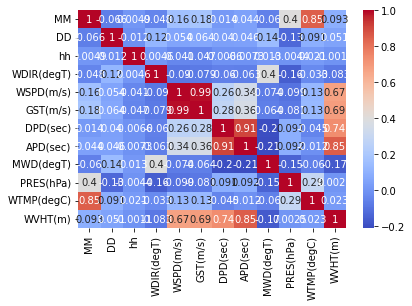

In [135]:
import pandas as pd
import seaborn as sns



# Select the two columns of interest
col1 = df3['DPD(sec)']
col2 = df3['APD(sec)']

# Create a correlation matrix
corr_matrix = df3.corr()

# Print the correlation coefficient between the two columns
print(corr_matrix.loc['DPD(sec)', 'APD(sec)'])

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [202]:
X = df3.drop(["WVHT(m)","MM"], axis=1)
y = df3["WVHT(m)"]

In [203]:
X.head()

,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC)
0,24,1,23,3.0,3.6,4.17,3.33,349,1019.1,5.1
1,24,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.8
2,24,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.7
3,24,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6
4,24,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.6


In [204]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [205]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [206]:
X_train_pca=X_train_scaled
X_test_pca=X_test_scaled

In [207]:
#Apply PCA to reduce the dimensionality of the data
# pca = PCA(n_components=9)  # specify the number of components to keep
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca =pca.transform(X_test_scaled)

In [208]:
# Train a linear regression model on the reduced data
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [209]:
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.013274988191209187


In [210]:
# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [211]:
y_pred = rf_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.007151947645502647


In [212]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_pca, y_train)

SVR()

In [213]:
y_pred_4 = regressor.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred_4)
print("Mean squared error:", mse)

Mean squared error: 0.007255238830767582


In [214]:
(y_pred.reshape(-1,1));

In [215]:
type(y_pred.reshape(-1,1))

numpy.ndarray

In [216]:
print(y_test)

1571    0.52
2762    0.78
3794    0.39
2600    0.67
2205    0.65
        ... 
963     0.35
3590    0.40
2923    0.88
159     1.40
171     0.65
Name: WVHT(m), Length: 756, dtype: float64


In [217]:
print(len(y_pred.reshape(-1,1)))

756


In [218]:
type(X_train_pca)

numpy.ndarray

In [219]:
df_1=pd.read_csv('/content/ML/OE_ML_COMP/test.csv')
df_1.head()
len(df_1)

1541

In [220]:
df_2=df_1.drop(["#YY","mm","ATMP(degC)","DEWP(degC)","ID","MM"],axis=1)

In [221]:
len(df_2)

1541

In [222]:
df_2.head()

,DD,hh,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),WTMP(degC)
0,2,22,340,6.7,8.2,2.35,2.37,177,1011.5,16.8
1,2,23,15,2.3,5.5,2.60,2.44,336,1010.7,16.9
2,3,1,11,1.6,2.7,3.13,2.95,341,1010.6,16.7
3,6,10,21,4.1,4.9,2.86,2.59,8,1015.8,20.3
4,6,11,16,4.5,5.4,2.74,2.64,16,1016.5,20.3


In [223]:
df_2_scaled = scaler.fit_transform(df_2)
df_2_scaled[0:1,:]

array([[-1.77364305,  1.52537209,  1.53338607,  0.25751781,  0.23604789,
        -1.94309545, -2.00224977,  0.09593973, -0.92007307, -2.40111839]])

In [224]:
# df_2_pca = pca.transform(df_2_scaled)
# df_2_pca[0:1,:]
df_2_pca=df_2_scaled

In [225]:
len(df_2_pca)

1541

In [226]:
y_pred_1 = rf_model.predict(df_2_pca)

In [227]:
y_pred_2=model.predict(df_2_pca)

In [228]:
y_pred_1.reshape(-1,1)

array([[0.3003],
       [0.3106],
       [0.3519],
       ...,
       [0.7993],
       [1.4648],
       [1.3072]])

In [229]:
y_pred_3=regressor.predict(df_2_pca)

In [230]:
y_pred_2.reshape(-1,1)

array([[0.20001897],
       [0.03910362],
       [0.16018156],
       ...,
       [0.87892818],
       [1.36427126],
       [1.2267482 ]])

In [239]:
df_9=pd.DataFrame(y_pred_1,columns = ['WVHT(m)'])
extracted_col=df_1['ID']

df_9 = df_9.join(extracted_col)
df_9.head()

,WVHT(m),ID
0,0.3003,2019722240
1,0.3106,2019722340
2,0.3519,201973140
3,0.2917,2019761040
4,0.2965,2019761140


In [240]:
len(extracted_col)

1541

In [241]:
df_9=df_9[['ID','WVHT(m)']]
df_9.head()

,ID,WVHT(m)
0,2019722240,0.3003
1,2019722340,0.3106
2,201973140,0.3519
3,2019761040,0.2917
4,2019761140,0.2965


In [242]:
len(df_9)

1541

In [243]:
df_9=df_9[~df_9.ID.duplicated()]
df_9.head()

,ID,WVHT(m)
0,2019722240,0.3003
1,2019722340,0.3106
2,201973140,0.3519
3,2019761040,0.2917
4,2019761140,0.2965


In [244]:
len(df_9)


1535

In [245]:
df_9.isnull().sum()

ID         0
WVHT(m)    0
dtype: int64

In [246]:
csv_data = df_9.to_csv('output8.csv',index=False)